# 🛍 Customer Clustering Project (Corrected)

Clustering analysis with proper correlation matrix handling and visualizations.


## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn-v0_8-whitegrid')

## Load dataset

In [2]:
df = pd.read_csv('Customer.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data info and summary

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Histograms

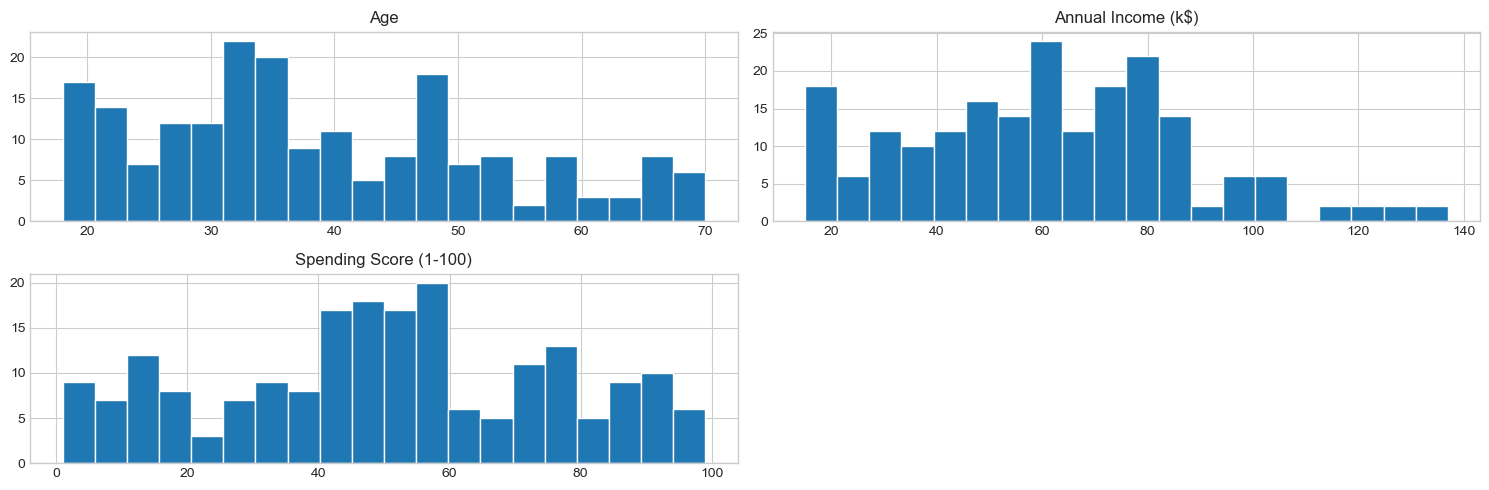

In [4]:
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(bins=20, figsize=(15,5))
plt.tight_layout()
plt.show()

## Correlation matrix (numeric columns only)

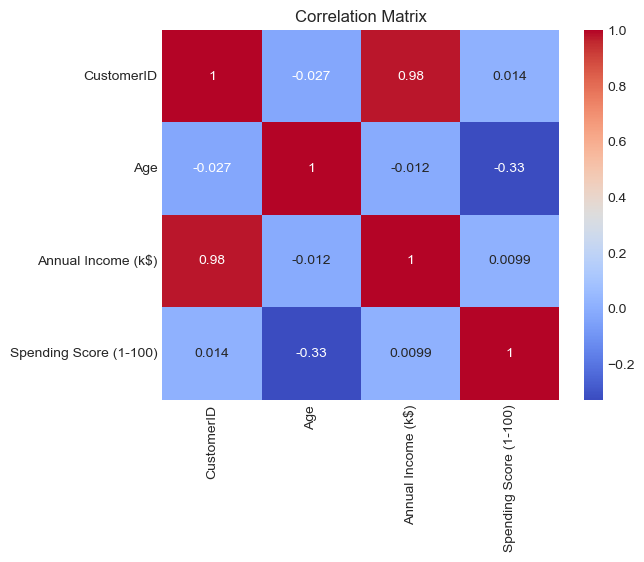

In [5]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Scatter: Income vs Spending

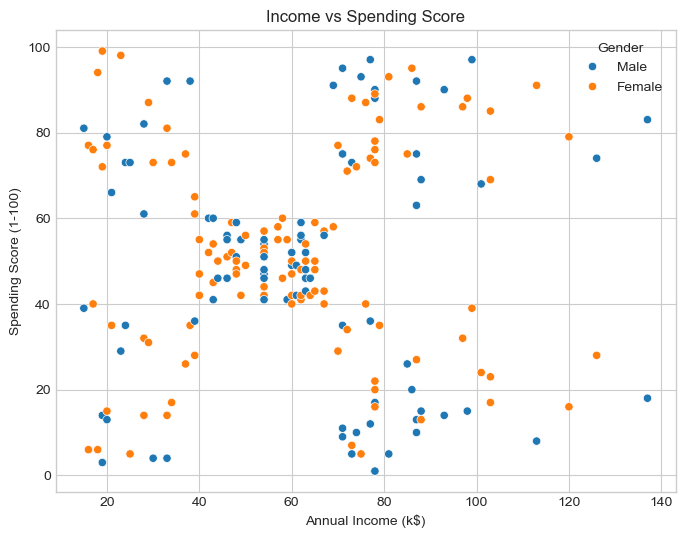

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Income vs Spending Score')
plt.show()

## Preprocessing

In [7]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## K-Means Elbow

C:\Users\rezav\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\rezav\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\rezav\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rezav\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\rezav\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

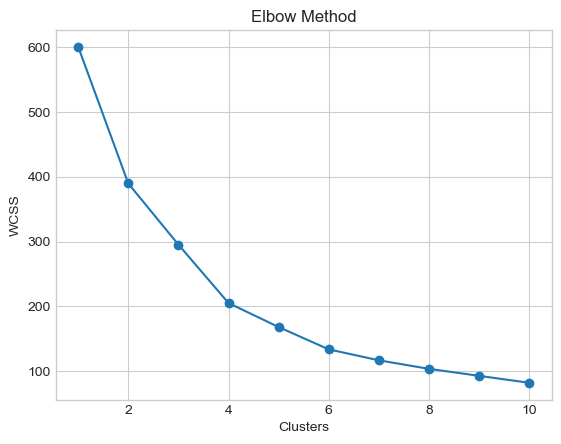

In [8]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

## K-Means Clustering

C:\Users\rezav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


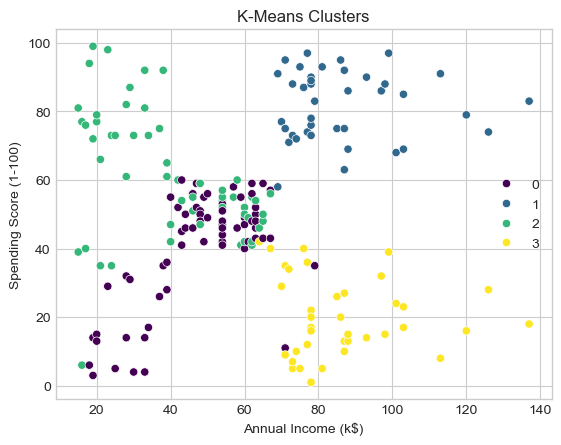

In [9]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = labels_kmeans

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=labels_kmeans, palette='viridis', data=df)
plt.title('K-Means Clusters')
plt.show()

## Hierarchical Clustering

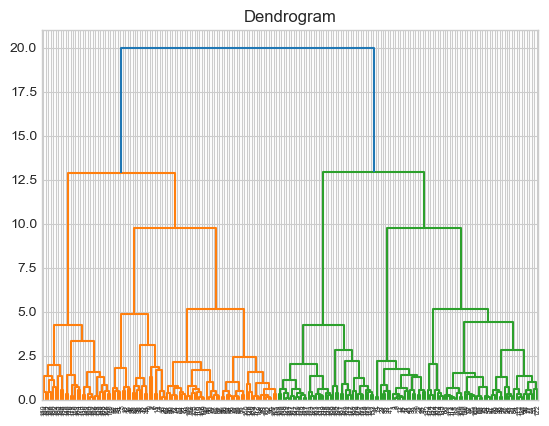

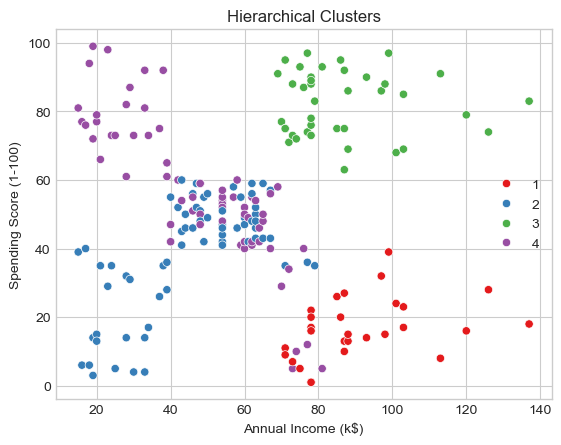

In [10]:
linked = linkage(X_scaled, method='ward')
dendrogram(linked)
plt.title('Dendrogram')
plt.show()

labels_hier = fcluster(linked, 4, criterion='maxclust')
df['Hierarchical_Cluster'] = labels_hier

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=labels_hier, palette='Set1', data=df)
plt.title('Hierarchical Clusters')
plt.show()

## DBSCAN Clustering

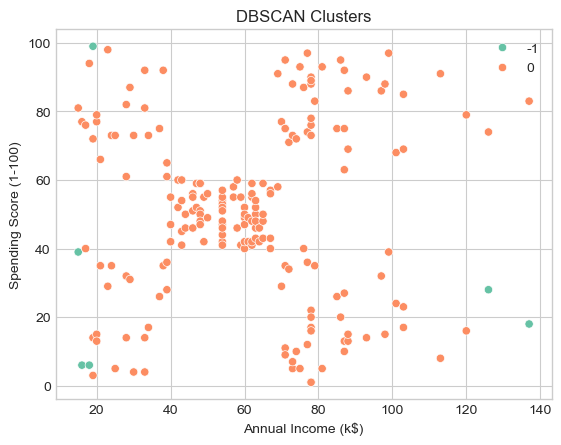

In [11]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = labels_dbscan

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=labels_dbscan, palette='Set2', data=df)
plt.title('DBSCAN Clusters')
plt.show()